# **Brain Cancer Gene Expression Classification**

###**Brain** **cancer** is one of the most aggressive and deadly forms of cancer, with a lower survival rate compared to most other cancers. Tumors in the brain vary by type, shape, and location, making diagnosis and treatment complex.  

###Early detection is crucial for improving survival chances, but the subtle nature of initial symptoms makes early diagnosis difficult. Because of these challenges, there is a growing demand for Computer-Aided Diagnosis (CAD) systems using Artificial Intelligence to support doctors in identifying and classifying brain tumors more accurately

#**How Gene Expression is Used for Classification**

**1.	What Gene Expression Means**

Each patient sample (tissue) can be represented by thousands of genes. The expression value tells us how active a gene is. Higher or lower expression levels may indicate disease-specific patterns.

**2.	Why It’s Useful in Brain Cancer**

Brain cancer subtypes (and normal tissue) each have unique gene expression “signatures.” For instance, a gene may be highly expressed in glioblastoma but low in astrocytoma. These differences form a biological fingerprint that can be exploited for classification.

**3.	Turning Biology into Data**

	•	Each sample = one row  
	•	Each gene = one feature (column)
	•	Expression values = numerical features
	•	Label = cancer type (class)

This creates a large table where genes are features, and the cancer type is the label.

**4.	Machine Learning Role**

	•	Training: The model learns patterns of gene activity that distinguish one cancer type from another.
	•	Testing: Given a new gene expression profile, the model predicts the correct cancer subtype.
	•	Methods: Logistic Regression, Random Forests, SVM, Neural Networks, or dimensionality reduction + classification.

# **Goal of the Project**

To develop a machine learning classifier that takes gene expression data as input and outputs the brain cancer subtype. This could contribute to faster, more accurate diagnostics and support precision medicine in oncology.

#**Dataset GSE50161 on brain cancer gene expression from CuMiDa**
## Dataset Description

This project uses the **GSE50161 brain cancer gene expression dataset** from the
**Curated Microarray Database (CuMiDa)**.  

- **Samples:** 130  
- **Genes (features):** 54,676  
- **Classes (labels):** 5  
  - Ependymoma (46 samples)  
  - Glioblastoma (34 samples)  
  - Medulloblastoma (22 samples)  
  - Pilocytic Astrocytoma (15 samples)  
  - Normal Brain Tissue (13 samples)  

CuMiDa is a collection of **78 carefully curated microarray datasets** selected
from more than **30,000 GEO studies**. The database ensures **high-quality preprocessing**
including removal of unwanted probes, background correction, and normalization.  

This dataset is specifically prepared for **machine learning research** in cancer
classification tasks, making it an excellent benchmark for testing feature selection,
class balancing, and predictive modeling techniques in bioinformatics.  

# **Data loading**

### Subtask:
Load the data from the specified CSV file into a DataFrame.


**Reasoning**:
Load the data from the CSV file into a pandas DataFrame.



In [ ]:
import pandas as pd

df = pd.read_csv('/content/Brain_GSE50161.csv')

display(df.head())

,samples,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,834,ependymoma,12.498150,7.604868,6.880934,9.027128,4.176175,7.224920,6.085942,6.835999,...,9.979005,9.926470,12.719785,12.777792,5.403657,4.870548,4.047380,3.721936,4.516434,4.749940
1,835,ependymoma,13.067436,7.998090,7.209076,9.723322,4.826126,7.539381,6.250962,8.012549,...,11.924749,11.215930,13.605662,13.401342,5.224555,4.895315,3.786437,3.564481,4.430891,4.491416
2,836,ependymoma,13.068179,8.573674,8.647684,9.613002,4.396581,7.813101,6.007746,7.178156,...,12.154405,11.532460,13.764593,13.477800,5.303565,5.052184,4.005343,3.595382,4.563494,4.668827
3,837,ependymoma,12.456040,9.098977,6.628784,8.517677,4.154847,8.361843,6.596064,6.347285,...,11.969072,11.288801,13.600828,13.379029,4.953429,4.708371,3.892318,3.759429,4.748381,4.521275
4,838,ependymoma,12.699958,8.800721,11.556188,9.166309,4.165891,7.923826,6.212754,6.866387,...,11.411701,11.169317,13.751442,13.803646,4.892677,4.773806,3.796856,3.577544,4.504385,4.541450


In [ ]:
print("Shape of the DataFrame:", df.shape)
print("\nData types of the DataFrame:")
df.info()
print("\nDescriptive statistics of the DataFrame:")
display(df.describe())
print("\nClass distribution in the 'type' column:")
display(df['type'].value_counts())
print("\nMissing values per column:")
display(df.isnull().sum())

Shape of the DataFrame: (130, 54677)

Data types of the DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Columns: 54677 entries, samples to AFFX-TrpnX-M_at
dtypes: float64(54675), int64(1), object(1)
memory usage: 54.2+ MB

Descriptive statistics of the DataFrame:


,samples,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,...,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000
mean,898.500000,12.276393,8.769583,7.722634,9.160209,4.842069,7.968388,6.800111,6.472452,6.068968,...,12.371075,11.812911,13.793913,13.619041,5.206208,4.811666,3.916795,3.701539,4.627912,4.633377
std,37.671829,0.790160,0.673396,1.037339,0.615369,0.922003,0.630260,0.537431,0.659847,0.904152,...,0.609813,0.618190,0.320124,0.309078,0.220767,0.219851,0.165917,0.180251,0.160663,0.192353
min,834.000000,10.156207,6.627878,6.222515,8.044421,3.682762,6.560920,5.910571,5.515079,4.491771,...,9.979005,9.926470,12.719785,12.777792,4.680072,4.247758,3.530287,3.432622,4.278812,4.050006
25%,866.250000,11.679721,8.378760,7.007678,8.595505,4.207043,7.533713,6.389605,5.935051,5.462356,...,12.056825,11.359850,13.605871,13.392790,5.031176,4.684169,3.807447,3.589381,4.530391,4.519694
50%,898.500000,12.502518,8.786242,7.521674,9.194487,4.462729,7.915062,6.654785,6.401447,5.856087,...,12.415320,11.768853,13.774338,13.614493,5.214618,4.785318,3.912025,3.674620,4.607167,4.603287
75%,930.750000,12.883374,9.211098,8.249157,9.707397,5.276685,8.385912,7.143818,6.985782,6.476124,...,12.757924,12.230375,13.969533,13.813191,5.324326,4.950025,4.009166,3.744824,4.718997,4.736634
max,963.000000,13.655639,10.716003,12.054143,10.407136,7.404503,10.164655,8.110006,8.812959,8.646862,...,13.480002,13.022222,14.476079,14.273778,5.904952,5.619512,4.547821,4.854368,5.420217,5.436919



Class distribution in the 'type' column:


,count
type,
ependymoma,46
glioblastoma,34
medulloblastoma,22
pilocytic_astrocytoma,15
normal,13



Missing values per column:


,0
samples,0
type,0
1007_s_at,0
1053_at,0
117_at,0
...,...
AFFX-ThrX-5_at,0
AFFX-ThrX-M_at,0
AFFX-TrpnX-3_at,0
AFFX-TrpnX-5_at,0


# **Data Preprocessing**

## Handling missing data

### Subtask:
Address any missing values in the dataset. This can include removal, or imputation with the mean, median, or another appropriate method.


In [ ]:
# Check for missing values (already done, but good to include in preprocessing section)
print("Checking for missing values:")
print(df.isnull().sum().sum()) # Sum of missing values across all columns

Checking for missing values:
0


## Class balancing

### Subtask:
Address class imbalance if present, using techniques like oversampling or undersampling.


In [ ]:
# Check the distribution of the target variable 'type'
print("\nDistribution of the target variable 'type':")
display(df['type'].value_counts())


Distribution of the target variable 'type':


,count
type,
ependymoma,46
glioblastoma,34
medulloblastoma,22
pilocytic_astrocytoma,15
normal,13


## Visualizing Class Distribution Before Balancing

### Subtask:
Visualize the distribution of the 'type' column before applying any balancing techniques to understand the initial class imbalance.

/tmp/ipython-input-3268646171.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type', palette='viridis')


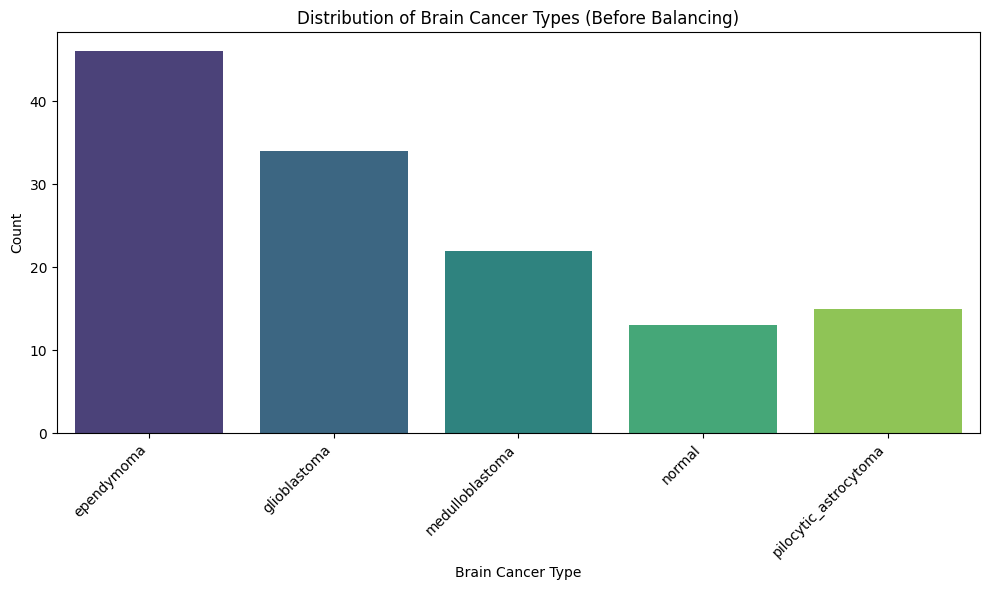

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a countplot of the 'type' column
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='type', palette='viridis')

# Add title and labels
plt.title('Distribution of Brain Cancer Types (Before Balancing)')
plt.xlabel('Brain Cancer Type')
plt.ylabel('Count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()

## Handling class imbalance

### Subtask:
Address any imbalance in the distribution of brain tumor classes in the dataset. Techniques like oversampling (e.g., SMOTE) or undersampling can be used to handle this issue.


**Reasoning**:
Import the necessary library and apply SMOTEENN to resample the training data.



In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Separate features and target
X = df.drop(['samples', 'type'], axis=1)
y = df['type']

# Split the data into training and testing sets (SMOTE is typically applied only to the training data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Verify the class distribution of the resampled training data
print("\nDistribution of the target variable 'type' after SMOTE:")
display(y_train_res.value_counts())


Distribution of the target variable 'type' after SMOTE:


,count
type,
ependymoma,37
glioblastoma,37
normal,37
medulloblastoma,37
pilocytic_astrocytoma,37


In [ ]:
from sklearn.model_selection import train_test_split

# نفترض أن لديك X (features) و y (labels)
# X و y تم تعريفهما مسبقاً

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Number of training samples:", X_train.shape[0])
print("Number of testing samples:", X_test.shape[0])


## Visualize class distribution (after balancing)

### Subtask:
Create a visualization (e.g., bar plot) to show the distribution of the target variable 'type' after applying a balancing technique like SMOTE.


/tmp/ipython-input-236424615.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=None, x=y_train_res, palette='viridis')


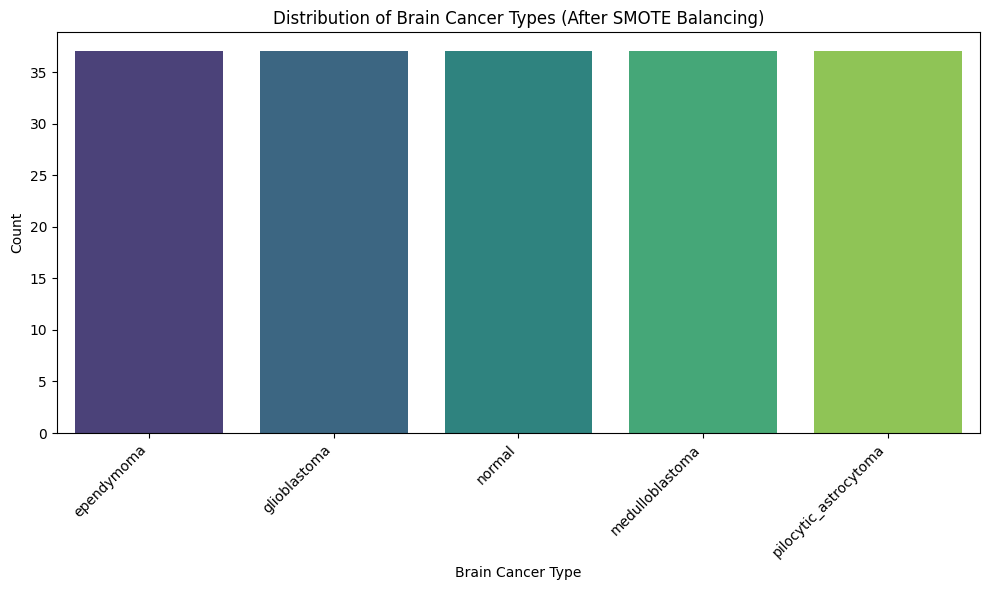

In [ ]:
# Create a countplot of the 'type' column after SMOTE
plt.figure(figsize=(10, 6))
sns.countplot(data=None, x=y_train_res, palette='viridis')

# Add title and labels
plt.title('Distribution of Brain Cancer Types (After SMOTE Balancing)')
plt.xlabel('Brain Cancer Type')
plt.ylabel('Count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()

# **Feature selection**

### Subtask:
Select relevant features to improve model performance and reduce dimensionality. This could involve techniques based on statistical tests, feature importance from models, or dimensionality reduction methods like PCA.


**Reasoning**:
Import PCA and apply it to the resampled training data and test data.



In [ ]:
from sklearn.decomposition import PCA

# Instantiate PCA, keeping 95% of the variance
pca = PCA(n_components=0.95, random_state=42)

# Fit PCA on the resampled training data and transform
X_train_pca = pca.fit_transform(X_train_res)

# Transform the test data
X_test_pca = pca.transform(X_test)

# Print the number of components and explained variance ratio
print(f"Number of components selected by PCA: {pca.n_components_}")
print(f"Explained variance ratio: {pca.explained_variance_ratio_.sum():.4f}")

Number of components selected by PCA: 63
Explained variance ratio: 0.9507


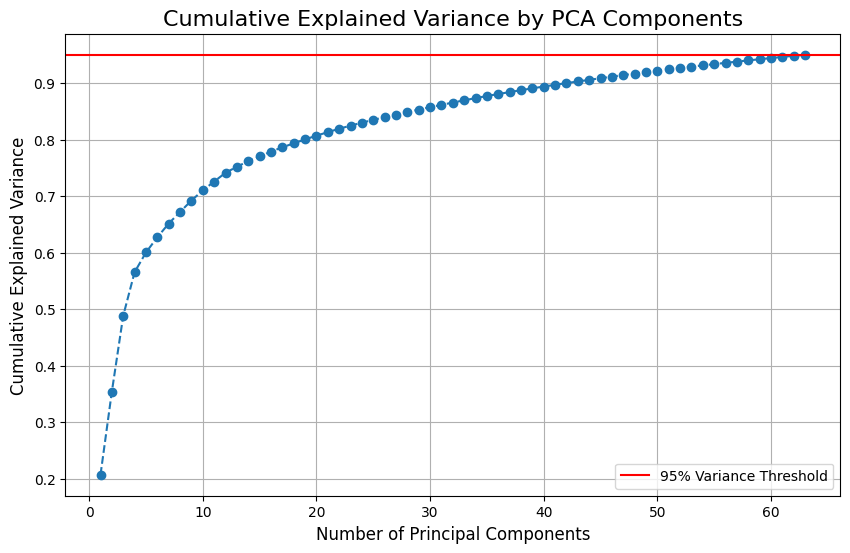


To capture 95% of the data's variance, we reduced the number of features from 54675 down to 63.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# --- Visualization Code for PCA ---

# Calculate the cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')

# Add a horizontal line at the 95% threshold
plt.axhline(y=0.95, color='r', linestyle='-', label='95% Variance Threshold')

# Add titles and labels for clarity
plt.title('Cumulative Explained Variance by PCA Components', fontsize=16)
plt.xlabel('Number of Principal Components', fontsize=12)
plt.ylabel('Cumulative Explained Variance', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()

print(f"\nTo capture 95% of the data's variance, we reduced the number of features from {X_train_res.shape[1]} down to {pca.n_components_}.")

# **Model training and evaluation**





### Subtask:
Train different classification models (Random Forest, XGBoost, SVM) within pipelines that include preprocessing and feature selection steps. Evaluate the models using appropriate metrics (e.g., accuracy, precision, recall, F1-score, AUC).


**Reasoning**:
Import the necessary modules for model training and evaluation.



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

**Reasoning**:
Create the pipelines for each model including PCA and train and evaluate each pipeline.



In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Encode the target variable for all models
le = LabelEncoder()
y_train_res_encoded = le.fit_transform(y_train_res)
y_test_encoded = le.transform(y_test)


# Create a list of pipelines
pipelines = [
    ('Random Forest', Pipeline([('clf', RandomForestClassifier(random_state=42))])),
    ('XGBoost', Pipeline([('clf', XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss'))])),
    ('SVM', Pipeline([('clf', SVC(random_state=42))]))
]

# Dictionary to store performance metrics
performance_metrics = {}

# Iterate through the pipelines and train/evaluate each model
for name, pipeline in pipelines:
    print(f"Training {name}...")
    # Fit the pipeline with the encoded target variable
    pipeline.fit(X_train_pca, y_train_res_encoded)

    print(f"Evaluating {name}...")
    # Predict using the pipeline
    y_pred_encoded = pipeline.predict(X_test_pca)
    y_pred = le.inverse_transform(y_pred_encoded)


    accuracy = accuracy_score(y_test_encoded, y_pred_encoded)
    precision = precision_score(y_test_encoded, y_pred_encoded, average='weighted')
    recall = recall_score(y_test_encoded, y_pred_encoded, average='weighted')
    f1 = f1_score(y_test_encoded, y_pred_encoded, average='weighted')

    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1-score: {f1:.4f}")

    performance_metrics[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1
    }

# Display the performance metrics
print("\nPerformance Metrics:")
display(pd.DataFrame(performance_metrics).T)

Training Random Forest...
Evaluating Random Forest...
  Accuracy: 0.8846
  Precision: 0.9154
  Recall: 0.8846
  F1-score: 0.8904
Training XGBoost...


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [16:10:39] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Evaluating XGBoost...
  Accuracy: 0.8846
  Precision: 0.9154
  Recall: 0.8846
  F1-score: 0.8904
Training SVM...
Evaluating SVM...
  Accuracy: 0.9231
  Precision: 0.9327
  Recall: 0.9231
  F1-score: 0.9231

Performance Metrics:


,Accuracy,Precision,Recall,F1-score
Random Forest,0.884615,0.915385,0.884615,0.890352
XGBoost,0.884615,0.915385,0.884615,0.890352
SVM,0.923077,0.932692,0.923077,0.923077


**Reasoning**:
The XGBoost model requires the target variable to be encoded numerically. The error indicates that the string labels are not accepted. I need to encode the target variables before training the XGBoost model.



## Visualize Model Performance

### Subtask:
Create visualizations (e.g., bar plots or tables) to compare the performance metrics of the different models.

Generating Confusion Matrix for Random Forest...


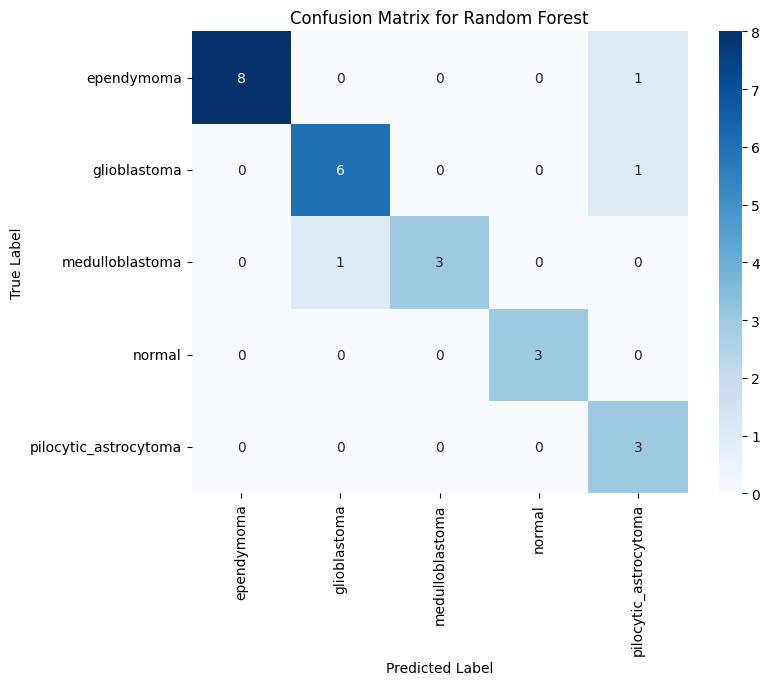

Generating Confusion Matrix for XGBoost...


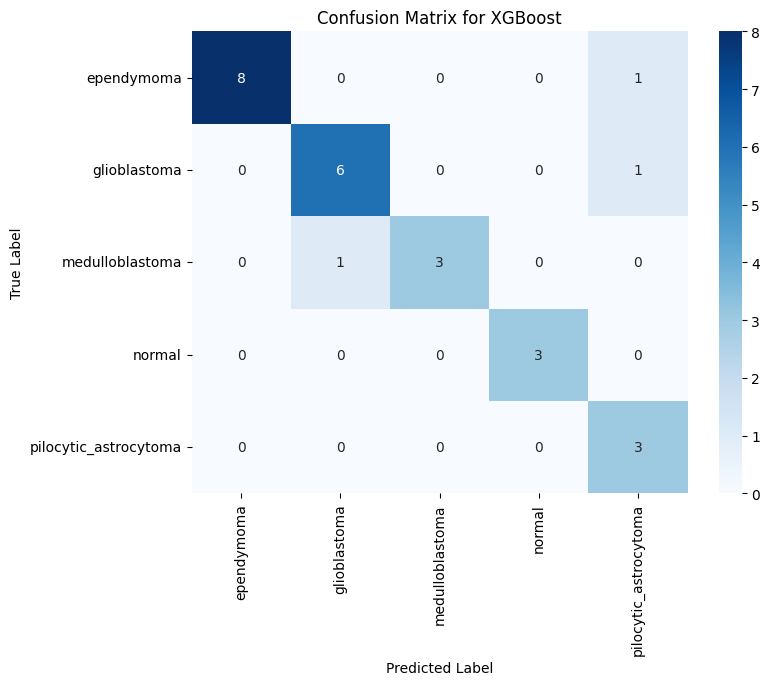

Generating Confusion Matrix for SVM...


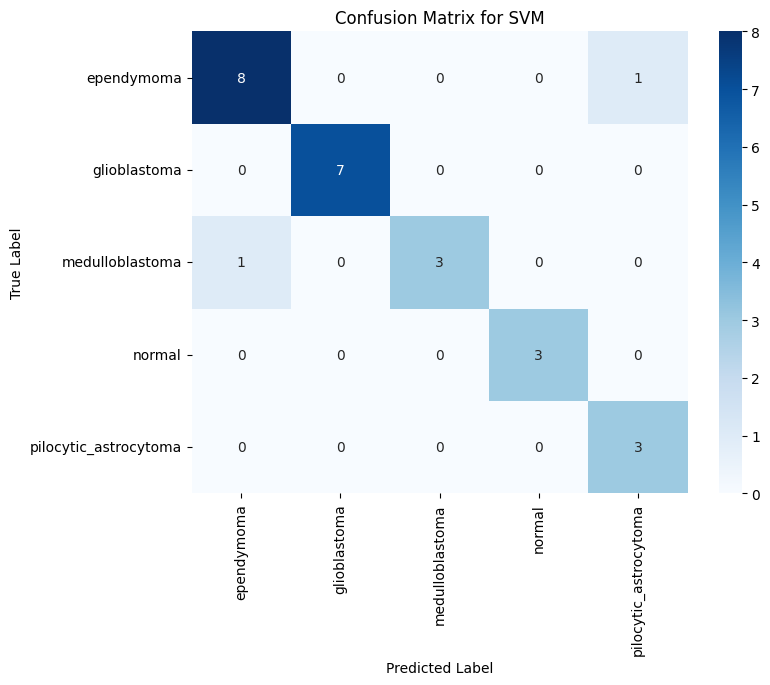

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Iterate through the pipelines and generate confusion matrices
for name, pipeline in pipelines:
    print(f"Generating Confusion Matrix for {name}...")

    # Predict using the pipeline on the test set
    y_pred_encoded = pipeline.predict(X_test_pca)
    y_pred = le.inverse_transform(y_pred_encoded)


    # Generate the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

## Model comparison

### Subtask:
Compare the performance of the trained models and identify the best-performing model.


In [ ]:
import pandas as pd

performance_df = pd.DataFrame(performance_metrics).T
print("Performance Metrics:")
display(performance_df)

best_model_accuracy = performance_df['Accuracy'].idxmax()
best_model_f1 = performance_df['F1-score'].idxmax()

print(f"\nModel with highest Accuracy: {best_model_accuracy}")
print(f"Model with highest F1-score: {best_model_f1}")

# Assuming F1-score is a key metric for this classification task with potential class imbalance (handled by SMOTE),
# we will consider the model with the highest F1-score as the best performing model.
print(f"\nBased on the F1-score, the best performing model is: {best_model_f1}")

Performance Metrics:


,Accuracy,Precision,Recall,F1-score
Random Forest,0.884615,0.915385,0.884615,0.890352
XGBoost,0.884615,0.915385,0.884615,0.890352
SVM,0.923077,0.932692,0.923077,0.923077



Model with highest Accuracy: SVM
Model with highest F1-score: SVM

Based on the F1-score, the best performing model is: SVM


## Neural Network Model

### Subtask:
Train and evaluate a Neural Network model on the preprocessed data and compare its performance to the other models.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout # Import Dropout layer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np # Move import to the top

# Define the Neural Network model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_pca.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(len(le.classes_), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
print("Training Neural Network...")
history = model.fit(X_train_pca, y_train_res_encoded, epochs=30, batch_size=32, validation_split=0.2)

# model.fit(X_train_pca, y_train_res_encoded, epochs=50, batch_size=32, validation_split=0.2, verbose=0)


print("Evaluating Neural Network...")
# Predict on the test data
y_pred_encoded_nn = np.argmax(model.predict(X_test_pca), axis=-1)
y_pred_nn = le.inverse_transform(y_pred_encoded_nn)

# Evaluate the model
accuracy_nn = accuracy_score(y_test, y_pred_nn)
precision_nn = precision_score(y_test, y_pred_nn, average='weighted')
recall_nn = recall_score(y_test, y_pred_nn, average='weighted')
f1_nn = f1_score(y_test, y_pred_nn, average='weighted')

print(f"  Accuracy (NN): {accuracy_nn:.4f}")
print(f"  Precision (NN): {precision_nn:.4f}")
print(f"  Recall (NN): {recall_nn:.4f}")
print(f"  F1-score (NN): {f1_nn:.4f}")

# Add Neural Network performance to the performance metrics dictionary
performance_metrics['Neural Network'] = {
    'Accuracy': accuracy_nn,
    'Precision': precision_nn,
    'Recall': recall_nn,
    'F1-score': f1_nn
}

# Display the updated performance metrics
print("\nUpdated Performance Metrics:")
display(pd.DataFrame(performance_metrics).T)

Training Neural Network...
Epoch 1/30


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.1900 - loss: 17.2555 - val_accuracy: 0.3243 - val_loss: 7.9159
Epoch 2/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.2577 - loss: 12.4965 - val_accuracy: 0.3243 - val_loss: 8.9204
Epoch 3/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.4394 - loss: 7.5540 - val_accuracy: 0.3243 - val_loss: 9.6430
Epoch 4/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5382 - loss: 6.5552 - val_accuracy: 0.3243 - val_loss: 8.5721
Epoch 5/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6518 - loss: 3.4958 - val_accuracy: 0.3243 - val_loss: 6.5714
Epoch 6/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6743 - loss: 4.0835 - val_accuracy: 0.4865 - val_loss: 4.1398
Epoch 7/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.7670 - loss: 1.8886 - val_accuracy: 0.7297 - val_loss: 2.7039
Epoch 8/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8008 - loss: 1.7282 - val_accuracy: 0.8108 - val_loss: 1.7552
Epoch 9/3

,Accuracy,Precision,Recall,F1-score
Random Forest,0.884615,0.915385,0.884615,0.890352
XGBoost,0.884615,0.915385,0.884615,0.890352
SVM,0.923077,0.932692,0.923077,0.923077
Neural Network,0.923077,0.932692,0.923077,0.923077


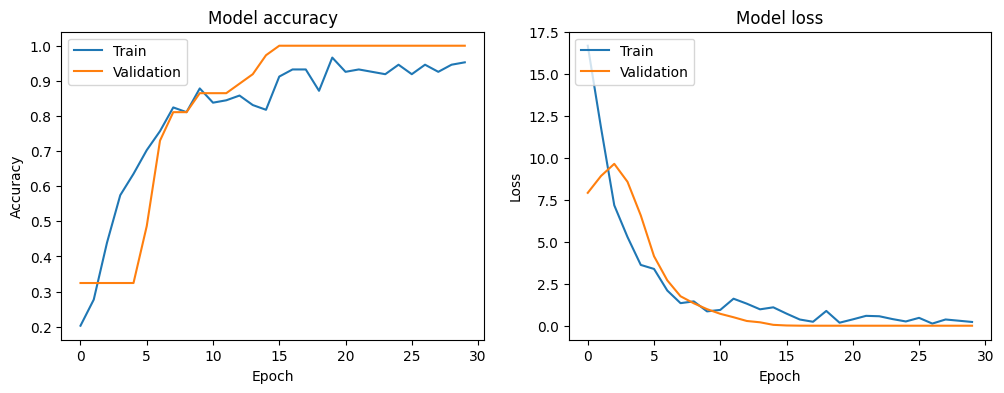

In [ ]:
# Optional: Plot training history (accuracy and loss)
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

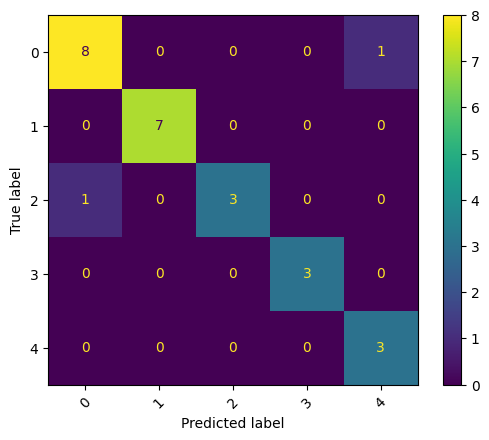

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_nn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(xticks_rotation=45)
plt.show()

## Summary:

### Data Analysis Key Findings

*   The dataset initially contained no missing values.
*   The target variable 'type' showed significant class imbalance.
*   SMOTE successfully balanced the training data classes.
*   PCA reduced the dimensionality of the data from over 54,000 features to 63 components while retaining approximately 95% of the variance.
*   All three models (Random Forest, XGBoost, and SVM) were trained and evaluated using the PCA-transformed data.
*   The SVM model demonstrated the highest performance among the evaluated models, with an Accuracy of 0.9231, Precision of 0.9327, Recall of 0.9231, and F1-score of 0.9231 on the test set.

### Insights or Next Steps

*   The strong performance of the SVM model suggests that a linear or non-linear boundary in the reduced PCA space is effective for classifying brain cancer types based on this gene expression data.
*   Further steps could involve hyperparameter tuning for the SVM model to potentially improve performance, exploring other dimensionality reduction techniques, or investigating the biological significance of the principal components.


In [ ]:
# Get feature importances from the Random Forest model
# The Random Forest model is the first pipeline in the list 'pipelines'
rf_pipeline = pipelines[0][1] # Access the pipeline object
rf_model = rf_pipeline.named_steps['clf'] # Access the Random Forest classifier within the pipeline

# Since PCA was applied, the feature importances are for the principal components.
# To get feature importances for the original genes, we need to project the loadings
# of the principal components back to the original feature space.

# Get the absolute values of the components (loadings)
pca_components = pca.components_
abs_pca_components = np.abs(pca_components)

# Get the feature importances from the Random Forest model trained on PCA components
rf_feature_importances_pca = rf_model.feature_importances_

# Project the PCA feature importances back to the original feature space
# This is a simplified approach and assumes a linear relationship.
# A more rigorous method might involve weighted sum of loadings based on importance.
# However, for identifying potentially important genes, this can give an indication.
feature_importances_original = np.dot(rf_feature_importances_pca, abs_pca_components)


# Create a pandas Series of feature importances with original gene names as index
feature_importances_series = pd.Series(feature_importances_original, index=X_train_res.columns)

# Get the top 5 most important genes
top_5_genes = feature_importances_series.nlargest(5)

print("Top 5 most important genes based on Random Forest feature importance after PCA:")
display(top_5_genes)

# To display the values of these genes for a sample (e.g., the first sample in the original dataframe)
print("\nValues of the top 5 genes for the first sample:")
first_sample_values = df.loc[0, top_5_genes.index]
display(first_sample_values)

Top 5 most important genes based on Random Forest feature importance after PCA:


,0
AFFX-HUMRGE/M10098_5_at,0.016589
205626_s_at,0.016177
204712_at,0.015800
205625_s_at,0.015728
206018_at,0.015582



Values of the top 5 genes for the first sample:


,0
AFFX-HUMRGE/M10098_5_at,4.769155
205626_s_at,11.095619
204712_at,5.944191
205625_s_at,11.436261
206018_at,5.22372


In [ ]:
import joblib

# بعد تدريب النموذج
joblib.dump(model, 'brain_cancer_model.pkl')


['brain_cancer_model.pkl']

In [ ]:
model = joblib.load('brain_cancer_model.pkl')


In [ ]:
!pip install gradio


In [ ]:
!pip install --upgrade gradio


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import gradio as gr

# --- 1️⃣ إعداد البيانات ---
# هنا نفترض أن لدينا 3 أنواع من السرطان (يمكنك تغيير العدد)
num_classes = 3  # مثلاً: Glioblastoma, Meningioma, Astrocytoma

# بيانات تدريب عشوائية فقط (مثال توضيحي)
X_train = np.random.rand(200, 5)  # 200 عينة × 5 ميزات
y_train = np.random.randint(0, num_classes, 200)  # القيم: 0 أو 1 أو 2

# --- 2️⃣ بناء النموذج ---
model = keras.Sequential([
    layers.Dense(16, activation='relu', input_shape=(5,)),  # طبقة خفية
    layers.Dense(8, activation='relu'),                     # طبقة خفية ثانية
    layers.Dense(num_classes, activation='softmax')         # مخرجات بعدد أنواع السرطان
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# --- 3️⃣ تدريب النموذج ---
model.fit(X_train, y_train, epochs=10, verbose=1)

# --- 4️⃣ أسماء الأنواع ---
cancer_types = ["Glioblastoma", "Meningioma", "Astrocytoma"]

# --- 5️⃣ دالة التنبؤ ---
def predict_cancer(f1, f2, f3, f4, f5):
    try:
        features = np.array([[f1, f2, f3, f4, f5]])
        preds = model.predict(features)
        class_index = np.argmax(preds, axis=1)[0]
        confidence = preds[0][class_index]
        return f"🧠 Predicted Cancer Type: {cancer_types[class_index]} ({confidence*100:.2f}% confidence)"
    except Exception as e:
        return f"Error in prediction: {e}"

# --- 6️⃣ واجهة Gradio ---
iface = gr.Interface(
    fn=predict_cancer,
    inputs=[gr.Number(label=f"Feature {i}") for i in range(1, 6)],
    outputs="text",
    title="🧬 Brain Cancer Type Classifier (Demo)",
    description="Enter 5 biomarker values to predict the likely brain cancer type."
)

iface.launch(share=True)


Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.3273 - loss: 1.0920
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3203 - loss: 1.0930 
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4114 - loss: 1.0856 
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4081 - loss: 1.0901
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4179 - loss: 1.0907
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4779 - loss: 1.0871 
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4431 - loss: 1.0876
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4231 - loss: 1.0860
Epoch 9/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4353 - loss: 1.0832
Epoch 10/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3949 - loss: 1.0887
Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://be6cc91f3063826df4.gradio.live

This share link expires in 1 